# Neural Networks
1. Read the dataset
2. Drop the columns which are unique for all users like IDs (2.5 points)
3. Distinguish the feature and target set (2.5 points)
4. Divide the data set into training and test sets ( 2.5 points)
5. Normalize the train and test data (5 points)
6. Initialize & build the model (10 points)
7. Predict the results using 0.5 as a threshold (5 points)
Print the Accuracy score and confusion matrix (2.5 points)

In [2]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization,Flatten
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from keras.optimizers import SGD
import keras
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [5]:
tf.__version__

'2.2.0-rc2'

In [3]:
 import io
 from google.colab import files
uploaded = files.upload()
#loading data
df = pd.read_csv(io.StringIO(uploaded['bank.csv'].decode('utf-8')))
 

Saving bank.csv to bank.csv


In [190]:
df.shape

(10000, 11)

In [244]:
#checking the input sample
df.head(10)
# we could observe the bank customer details

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [189]:
#checking for null
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [210]:
#checking the 5 point summary of numerical data
df.drop(['RowNumber','CustomerId'],axis =1).describe().T
#from the above we could observe that most of the features are normally distributed

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [0]:
#understanding the data

In [212]:
df.info()
#There are 10,000 rows and 12 features and 1 target variable .There ae no null values except surname, geography and gender other are numerical and float values.
#surname,gender,geography are categorical variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


(-1.1107416681807245,
 1.1005115080086059,
 -1.1119466189728702,
 1.1258189261495668)

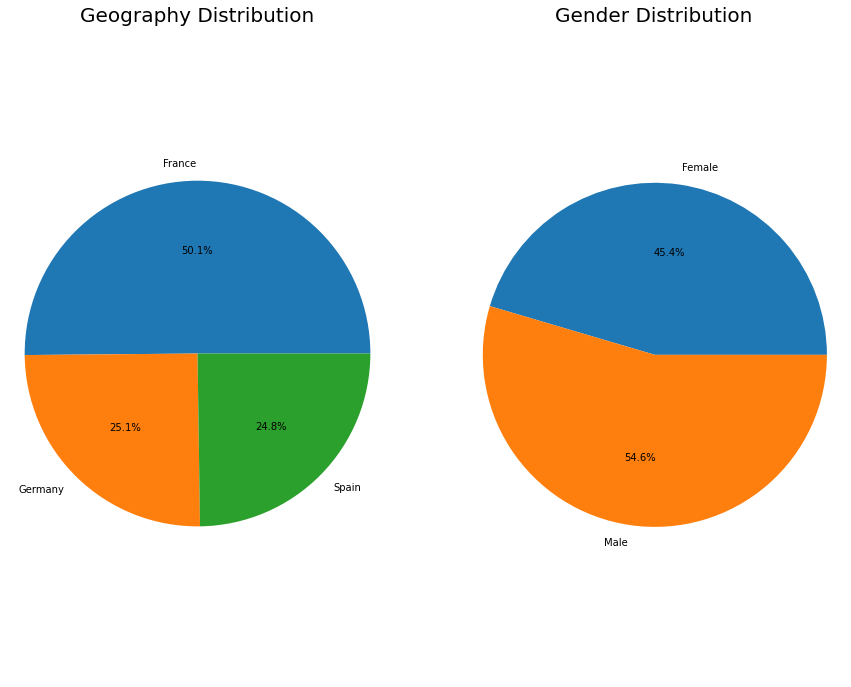

In [50]:
#prepare subplots, with 2 columns and 2 rows
#pechart representation of categorical variables
fig1, ((ax11,ax12)) = plt.subplots(1,2)
#set full plot size
fig1.set_size_inches(15,12)
ax11.pie(df.groupby("Geography").size().values, labels=df.groupby('Geography').size().keys(), autopct='%1.1f%%')
ax11.set_title("Geography Distribution", fontsize=20)
ax11.axis('equal')
#Create a pie chart of the Gender distribution
ax12.pie(df.groupby("Gender").size().values, labels=df.groupby('Gender').size().keys(), autopct="%1.1f%%")
ax12.set_title("Gender Distribution", fontsize=20)
ax12.axis('equal')


(-1.1014825974205327,
 1.1000705998771683,
 -1.1021772907452057,
 1.1008709647636756)

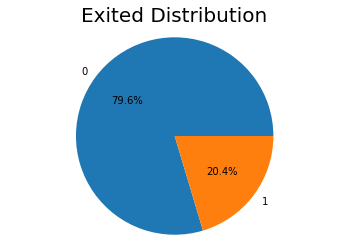

In [53]:
fig1 , ax11 = plt.subplots(1,1)
#Create a pie chart of the Gender distribution
ax11.pie(df.groupby("Exited").size().values, labels=df.groupby('Exited').size().keys(), autopct="%1.1f%%")
ax11.set_title("Exited Distribution", fontsize=20)
ax11.axis('equal')

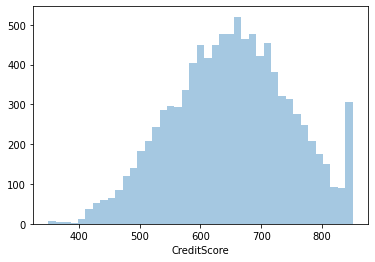

In [214]:
#distribution of numerical data creditscore it ranges from 400 to 800 with few outliers
sns.distplot(df['CreditScore'],hist =True , kde= False)

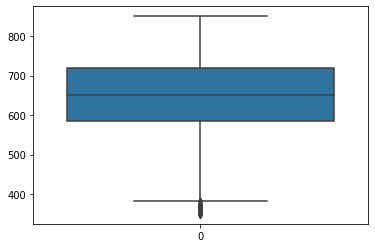

In [215]:
sns.boxplot(data = df['CreditScore'])

In [0]:
#we could observer few outliers in credit score

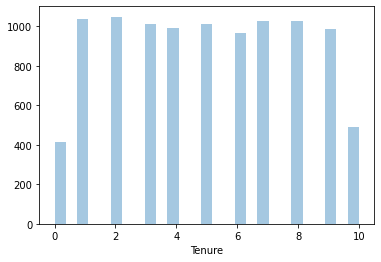

In [217]:
sns.distplot(df['Tenure'],hist =True , kde= False)

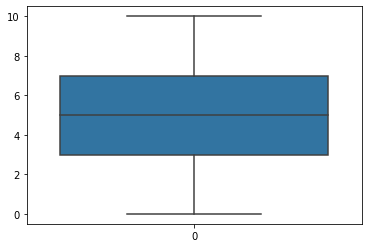

In [8]:
sns.boxplot(data = df['Tenure'])

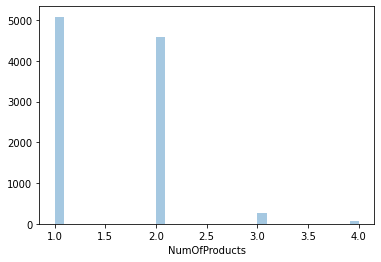

In [9]:
sns.distplot(df['NumOfProducts'],hist =True , kde= False)

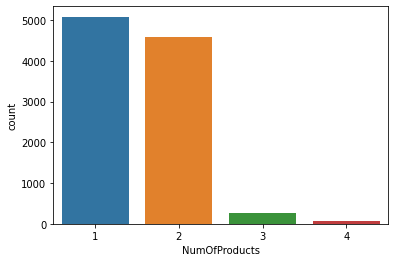

In [47]:
sns.countplot(data = df , x= df['NumOfProducts'])

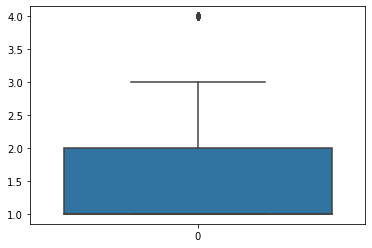

In [10]:
sns.boxplot(data = df['NumOfProducts'])
# we could see signle outlier in NumOfProducts

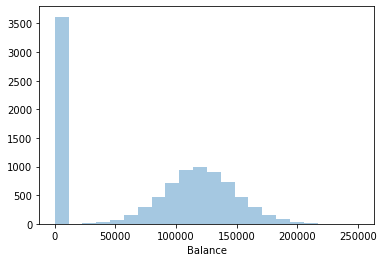

In [221]:
sns.distplot(df['Balance'],hist =True , kde= False)

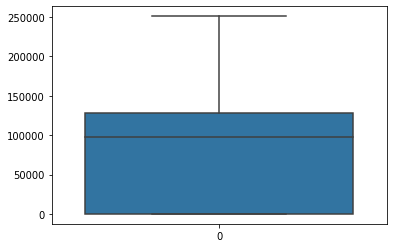

In [222]:
sns.boxplot(data = df['Balance'])


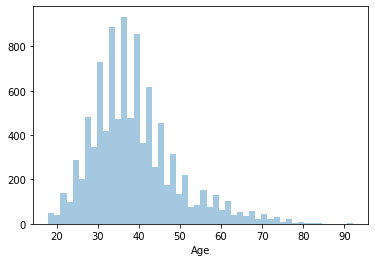

In [223]:
sns.distplot(df['Age'],hist =True , kde= False)

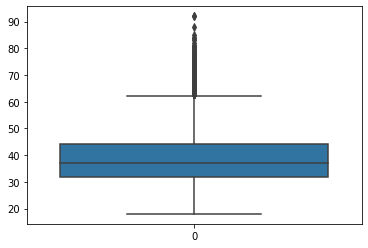

In [224]:
sns.boxplot(data = df['Age'])
#there is significant amount of outliers in Age. which could be meaningful data

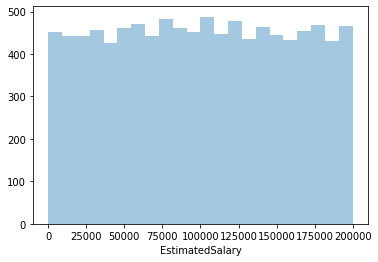

In [225]:
sns.distplot(df['EstimatedSalary'],hist =True , kde= False)

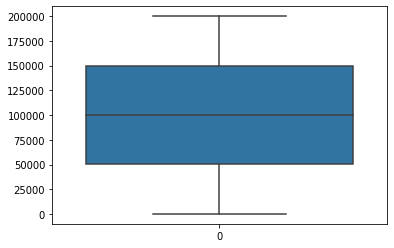

In [226]:
sns.boxplot(data = df['EstimatedSalary'])


In [227]:
df.groupby(['Exited']).count()
#we could observer class imbalance . For Class 0 there are 7963 records but for class 1 only 2037 records are present

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,,,,
0,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963
1,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037


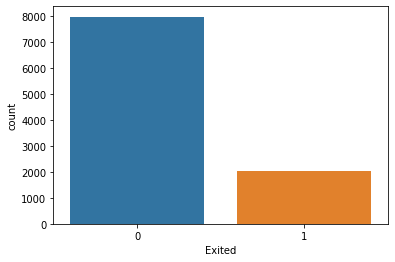

In [228]:
sns.countplot(data = df, x='Exited')

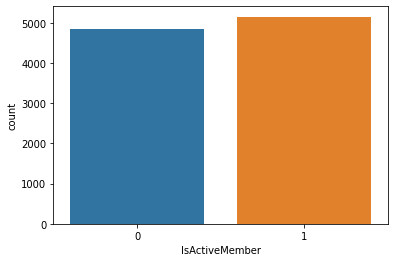

In [229]:
sns.countplot(data = df, x='IsActiveMember')

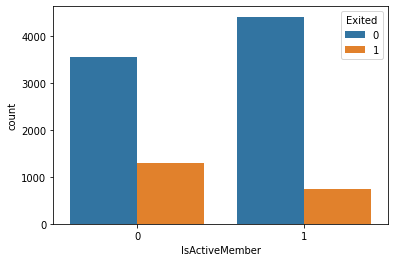

In [77]:
sns.countplot(data = df, x='IsActiveMember' , hue= 'Exited')
#the Attrition rate is more in Activemembership

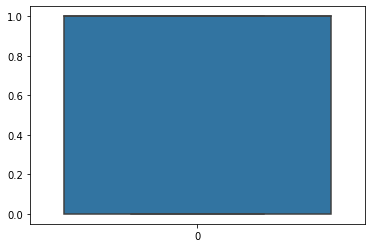

In [230]:
sns.boxplot(data = df['IsActiveMember'])


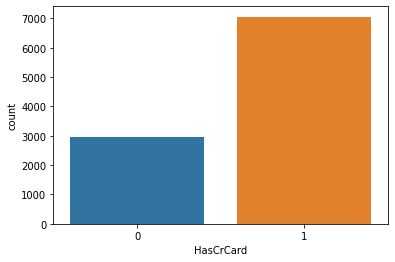

In [231]:
sns.countplot(data = df, x='HasCrCard')

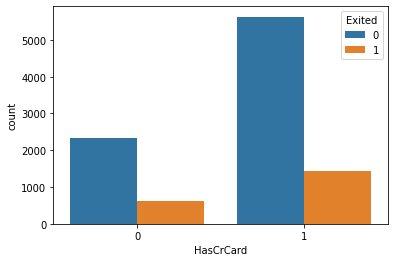

In [20]:
sns.countplot(data = df, x='HasCrCard' , hue= 'Exited')
#attrition rate is more customers with credit card

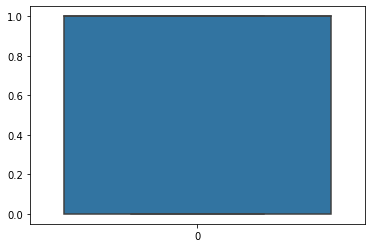

In [232]:
sns.boxplot(data = df['HasCrCard'])


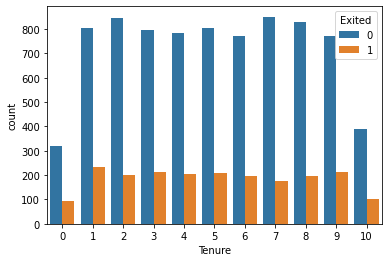

In [21]:
sns.countplot(data = df, x='Tenure' , hue= 'Exited')


In [0]:
#Tenure does not give enough information in predicting the Exit rate

###### From the box plot we could observe few outliers on credit scores and Age columns which could be meaningful values. hence not treating them as outliers and treating them as extreme values

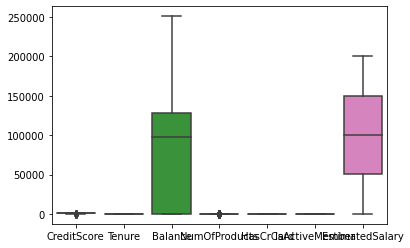

In [234]:
sns.boxplot(data = df.drop(['RowNumber','CustomerId','Surname','Exited','Age','Gender'], axis = 1))

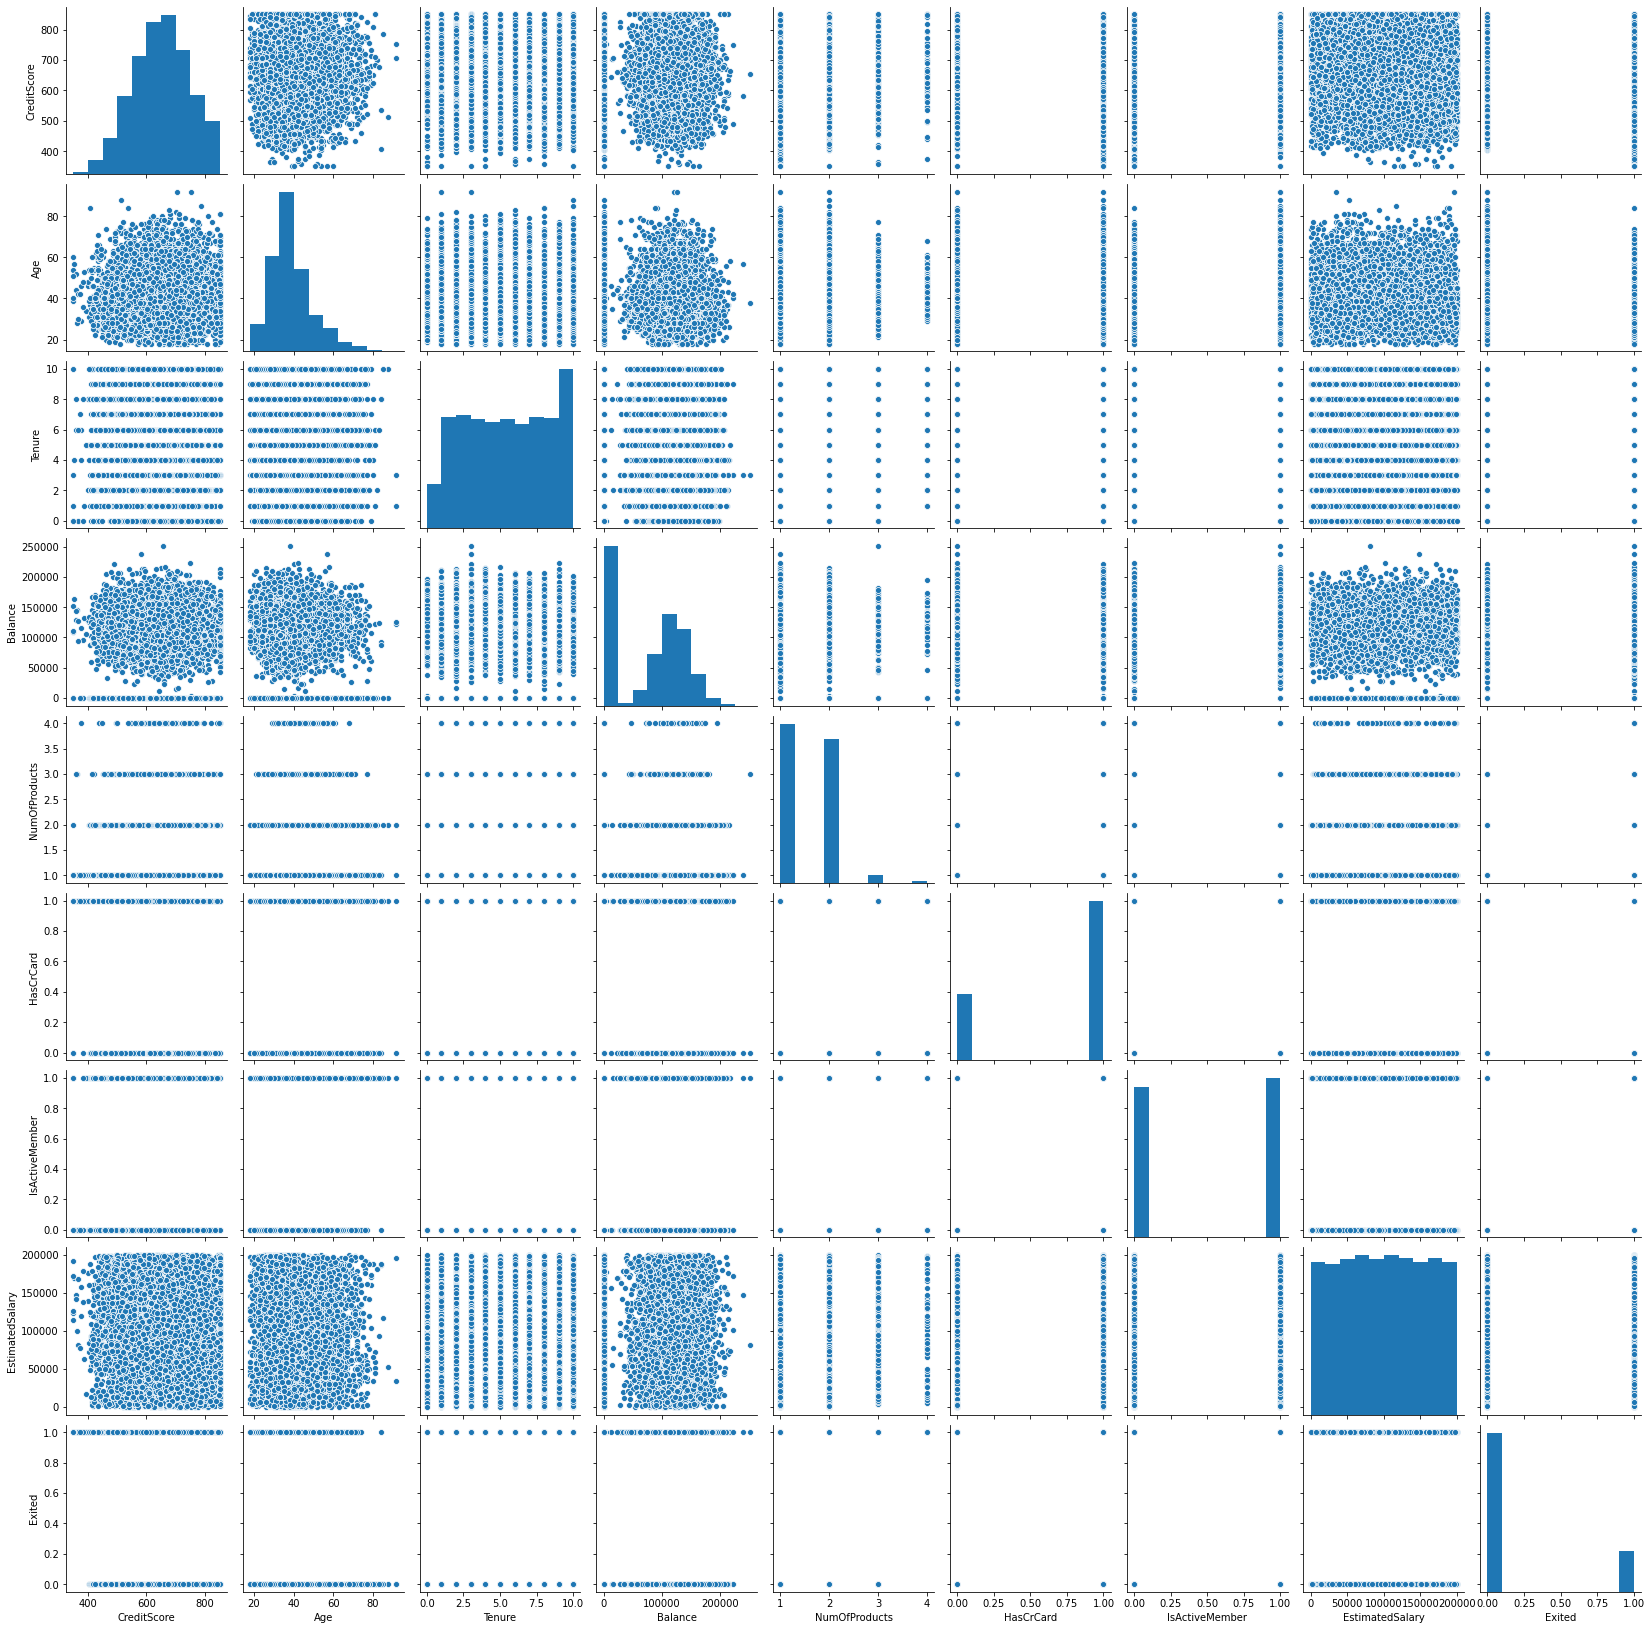

In [235]:
sns.pairplot(df.drop(['RowNumber','CustomerId','Surname'],axis=1))
#using pairplot to understand the data distribution

In [0]:
#from the pairplot we could observe that EstimatedSalary, Balance,CreditScore, Age are distributed in densly packed cloud manner.


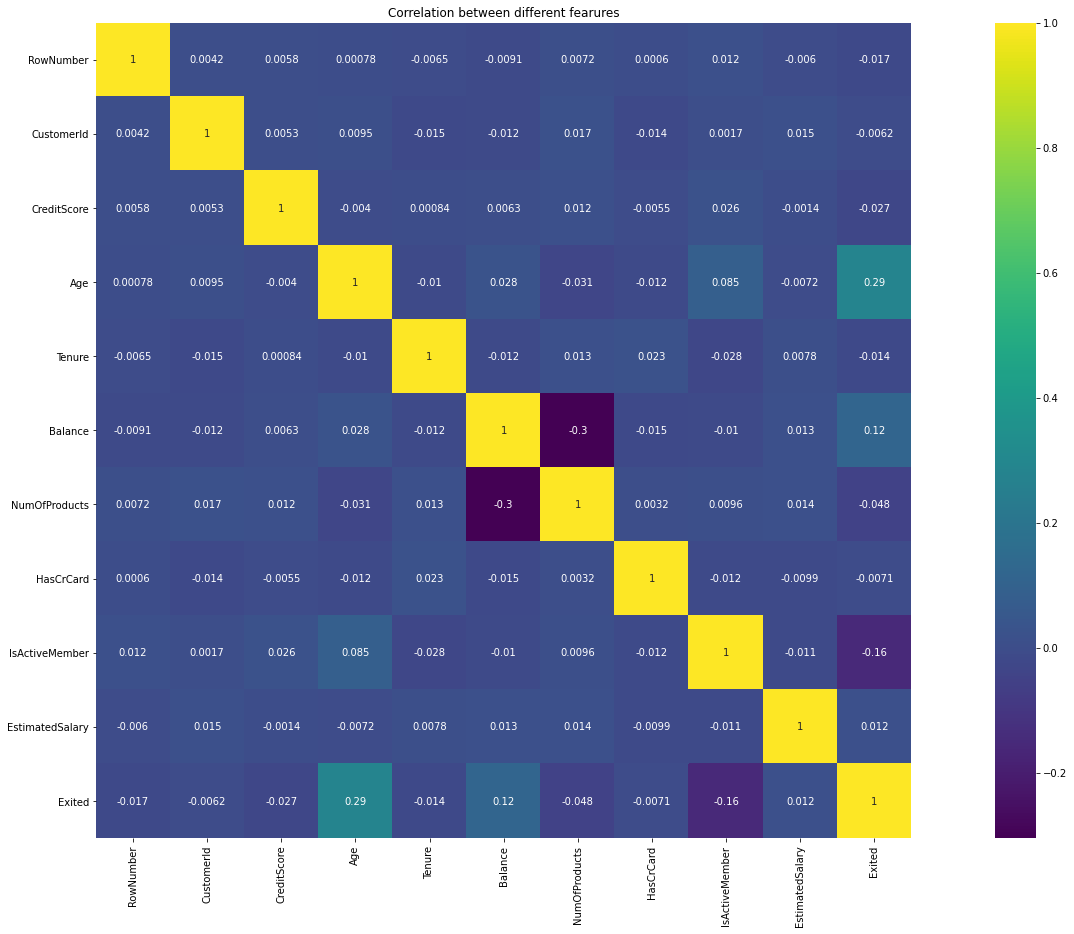

In [237]:
#using correaltion to know the feature correlation
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(), vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlation between different fearures')
plt.show();

###### From Correlation matrix we could observer that age and balance are highly correlated with target variable. We are allowing all the features to neural network model as it learns features through layers

In [238]:
df.shape

(10000, 14)

In [0]:
#there are 10000 rows and 14 columns in dataset

######Drop the columns which are unique for all users like IDs

In [0]:
##dropping the uniques columns for all the users
df.drop(['RowNumber','CustomerId','Surname'],axis=1 ,inplace = True)

In [5]:
#verying the data after dropping
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


###### Distinguish the feature and target set

In [0]:
#Defining feature and target variables. Exited is the target column. Remaining columns are features
X = df.drop(['Exited'],axis = 1)
y = df['Exited']

In [0]:
#using get dummies to convert categorical variable into numerical. Dropping the first_column to avoid adding more columns
X = pd.get_dummies(X, drop_first = True)

In [12]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


#### Divide the data set into training and test sets

In [0]:
#dividing the data into train and test in the ratio 80:20
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1)

#### Normalize the train and test data

In [0]:
#using standardscaler to normalize the train and test data

In [0]:
sc = StandardScaler()

In [0]:
X_train = sc.fit_transform(X_train)

In [0]:
X_test = sc.fit_transform(X_test)

In [133]:
#verying data after scaling
X_train[1:5]

array([[-0.25150912, -0.94449979, -0.35520275,  0.46984886,  0.80225696,
        -1.55337352, -1.02327069, -1.02548708, -0.58312392, -0.57273139,
        -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579,  0.85878772, -0.91150957,
         0.64376017,  0.97725852, -0.94479772,  1.71490137, -0.57273139,
        -1.09278791],
       [-0.04462173,  1.25262228,  0.33787579,  0.56560403,  0.80225696,
        -1.55337352,  0.97725852, -0.55194615,  1.71490137, -0.57273139,
        -1.09278791],
       [ 0.6587954 , -0.56239161,  1.03095433,  0.730395  , -0.91150957,
        -1.55337352, -1.02327069,  1.0833828 , -0.58312392,  1.74601919,
         0.91509065]])

In [134]:
#using Z-score to verify the data
from scipy.stats import zscore
X_train1 = zscore(X_train)
X_train1[1:10]

array([[-0.25150912, -0.94449979, -0.35520275,  0.46984886,  0.80225696,
        -1.55337352, -1.02327069, -1.02548708, -0.58312392, -0.57273139,
        -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579,  0.85878772, -0.91150957,
         0.64376017,  0.97725852, -0.94479772,  1.71490137, -0.57273139,
        -1.09278791],
       [-0.04462173,  1.25262228,  0.33787579,  0.56560403,  0.80225696,
        -1.55337352,  0.97725852, -0.55194615,  1.71490137, -0.57273139,
        -1.09278791],
       [ 0.6587954 , -0.56239161,  1.03095433,  0.730395  , -0.91150957,
        -1.55337352, -1.02327069,  1.0833828 , -0.58312392,  1.74601919,
         0.91509065],
       [ 0.47259675,  0.10629772, -0.70174202,  1.23741131, -0.91150957,
         0.64376017,  0.97725852,  0.66366853, -0.58312392,  1.74601919,
         0.91509065],
       [ 1.25876883, -0.27581047, -0.70174202,  0.57026069, -0.91150957,
         0.64376017,  0.97725852,  1.50778152, -0.58312392,  1.74601919,
         0.915

In [0]:
#The normalised data obtained from standar scalar and z-core are same. Hence continuing with the scaled data obtained through standardscalar

###### Building a neural Network with a binary crossentropy loss function and sgd optimizer in Keras. The output layer with 1 neurons as it is binary classfication and activation layer as sigmoid as we want the results in the range between 0 to 1. Since it is binary classficiation we are using sigmoid as activation function in the output layer. We would be using relu as activation function for other layers. relu is not recommended for the output layers

In [0]:
model = tf.keras.Sequential()

In [0]:
model.add(tf.keras.layers.Flatten(input_shape=(11,)))

In [0]:
model.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))

In [0]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=["accuracy"])

In [277]:
output1= model.fit(X_train, y_train , validation_data= (X_test, y_test), epochs = 25)

Epoch 1/25
250/250 [==============================] - 1s 2ms/step - loss: 0.7856 - accuracy: 0.5325 - val_loss: 0.6272 - val_accuracy: 0.6570
Epoch 2/25
250/250 [==============================] - 0s 2ms/step - loss: 0.5588 - accuracy: 0.7473 - val_loss: 0.5048 - val_accuracy: 0.8030
Epoch 3/25
250/250 [==============================] - 0s 2ms/step - loss: 0.4851 - accuracy: 0.8041 - val_loss: 0.4621 - val_accuracy: 0.8095
Epoch 4/25
250/250 [==============================] - 0s 2ms/step - loss: 0.4575 - accuracy: 0.8092 - val_loss: 0.4443 - val_accuracy: 0.8100
Epoch 5/25
250/250 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.8109 - val_loss: 0.4356 - val_accuracy: 0.8125
Epoch 6/25
250/250 [==============================] - 0s 2ms/step - loss: 0.4387 - accuracy: 0.8110 - val_loss: 0.4309 - val_accuracy: 0.8115
Epoch 7/25
250/250 [==============================] - 0s 2ms/step - loss: 0.4351 - accuracy: 0.8112 - val_loss: 0.4283 - val_accuracy: 0.8115
Epoch 

Train: 0.812, Test: 0.812


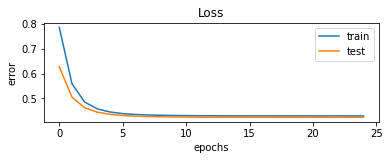

In [278]:
# evaluate the model
from matplotlib import pyplot
_, trainloss = model.evaluate(X_train, y_train, verbose=0)
_, testloss = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (trainloss, testloss))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.xlabel('epochs')
pyplot.ylabel('error')

pyplot.plot(output1.history['loss'], label='train')
pyplot.plot(output1.history['val_loss'], label='test')
pyplot.legend()

In [62]:
y_predict1= model.predict(X_test)
y_predict1
threshold=0.5
y_predict_1 = np.where(model.predict(X_test) > threshold, 1, 0)
y_predict_1

print('The accuracy score of the NN model is',accuracy_score(y_test,y_predict_1)*100)

The accuracy score of the NN model is 81.2


##### From the graph we could observe that there is maximum error in initial epochs and error drops with increasing epochs.Also we could see little bias in the test data and the accuracy of the model is quite low without hidden layers.

##### The model accuracy is 81% without hidden layers. Will be adding hidden layers and activation function to this model to check the improvement in performance of the model. Test error has dropped compared to train error.

In [0]:
##adding batchnormalization layer to the model
modelB = tf.keras.Sequential()
modelB.add(tf.keras.layers.Flatten(input_shape=(11,)))
modelB.add(tf.keras.layers.BatchNormalization())
modelB.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [271]:
modelB.compile(optimizer='sgd',loss='binary_crossentropy',metrics=["accuracy"])
outputB = modelB.fit(X_train, y_train , validation_data= (X_test, y_test), epochs = 35)

Epoch 1/35
250/250 [==============================] - 1s 2ms/step - loss: 0.6896 - accuracy: 0.6225 - val_loss: 0.5811 - val_accuracy: 0.7290
Epoch 2/35
250/250 [==============================] - 1s 2ms/step - loss: 0.5301 - accuracy: 0.7648 - val_loss: 0.5034 - val_accuracy: 0.7860
Epoch 3/35
250/250 [==============================] - 1s 2ms/step - loss: 0.4829 - accuracy: 0.7916 - val_loss: 0.4699 - val_accuracy: 0.7975
Epoch 4/35
250/250 [==============================] - 1s 2ms/step - loss: 0.4595 - accuracy: 0.8039 - val_loss: 0.4521 - val_accuracy: 0.8055
Epoch 5/35
250/250 [==============================] - 1s 2ms/step - loss: 0.4480 - accuracy: 0.8058 - val_loss: 0.4429 - val_accuracy: 0.8105
Epoch 6/35
250/250 [==============================] - 1s 2ms/step - loss: 0.4427 - accuracy: 0.8073 - val_loss: 0.4377 - val_accuracy: 0.8115
Epoch 7/35
250/250 [==============================] - 1s 2ms/step - loss: 0.4381 - accuracy: 0.8079 - val_loss: 0.4339 - val_accuracy: 0.8085
Epoch 

Train: 0.812, Test: 0.811


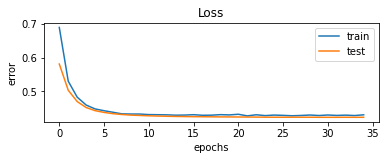

In [272]:
# evaluate the model
from matplotlib import pyplot
_, trainloss = modelB.evaluate(X_train, y_train, verbose=0)
_, testloss = modelB.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (trainloss, testloss))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(outputB.history['loss'], label='train')
pyplot.plot(outputB.history['val_loss'], label='test')
pyplot.xlabel('epochs')
pyplot.ylabel('error')

pyplot.legend()

##### with the addition of BatchNormalization layer bias has increased slightly. test error has further reduced than train error. Let us include hidden layer to our model

In [279]:
#adding a single hidden layers to the model. relu is a good activation function to be added to the hidden layers. It is most comonly used activation function
#f(z) is zero when z is less than zero and f(z) is equal to z when z is above or equal to zero.
modelB1 = tf.keras.Sequential()
modelB1.add(tf.keras.layers.Flatten(input_shape=(11,)))
#modelB.add(tf.keras.layers.BatchNormalization())
modelB1.add(tf.keras.layers.Dense(8, activation='relu'))
modelB1.add(tf.keras.layers.Dense(1, activation='sigmoid'))
modelB1.compile(optimizer='sgd',loss='binary_crossentropy',metrics=["accuracy"])
outputB1 = modelB1.fit(X_train, y_train , validation_data= (X_test, y_test), epochs = 35)

Epoch 1/35
250/250 [==============================] - 1s 2ms/step - loss: 0.6693 - accuracy: 0.6316 - val_loss: 0.5738 - val_accuracy: 0.7780
Epoch 2/35
250/250 [==============================] - 1s 2ms/step - loss: 0.5432 - accuracy: 0.7947 - val_loss: 0.5288 - val_accuracy: 0.7925
Epoch 3/35
250/250 [==============================] - 1s 2ms/step - loss: 0.5118 - accuracy: 0.7971 - val_loss: 0.5041 - val_accuracy: 0.7930
Epoch 4/35
250/250 [==============================] - 1s 2ms/step - loss: 0.4926 - accuracy: 0.7975 - val_loss: 0.4867 - val_accuracy: 0.7955
Epoch 5/35
250/250 [==============================] - 1s 2ms/step - loss: 0.4789 - accuracy: 0.8004 - val_loss: 0.4740 - val_accuracy: 0.8000
Epoch 6/35
250/250 [==============================] - 1s 2ms/step - loss: 0.4685 - accuracy: 0.8021 - val_loss: 0.4640 - val_accuracy: 0.8050
Epoch 7/35
250/250 [==============================] - 1s 2ms/step - loss: 0.4607 - accuracy: 0.8039 - val_loss: 0.4567 - val_accuracy: 0.8080
Epoch 

##### Adding single layer has increased the model accuracy to 84% from 81%. Let's further add a hidden layer to identify the performance improvement in the model

Train: 0.837, Test: 0.839


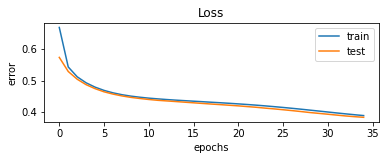

In [280]:
# evaluate the model
from matplotlib import pyplot
_, trainloss = modelB1.evaluate(X_train, y_train, verbose=0)
_, testloss = modelB1.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (trainloss, testloss))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(outputB1.history['loss'], label='train')
pyplot.plot(outputB1.history['val_loss'], label='test')
pyplot.xlabel('epochs')
pyplot.ylabel('error')

pyplot.legend()

###### Model has performed in a similar manner between training and validation data. There is maximum error in initial epochs and error drops with increasing epochs

In [70]:
y_predictb = modelB1.predict(X_test)
y_predictb
threshold=0.5
y_predict_b = np.where(modelB1.predict(X_test) > threshold, 1, 0)
y_predict_b

print('The accuracy of the model with 1 hidden layer is',accuracy_score(y_test,y_predict_b)*100)

The accuracy of the model with 1 hidden layer is 84.35000000000001


In [264]:
#will add second hidden layer to predict the model accuracy
modelh = tf.keras.Sequential()
modelh.add(tf.keras.layers.Flatten(input_shape=(11,)))
modelh.add(tf.keras.layers.BatchNormalization())
modelh.add(tf.keras.layers.Dense(8, activation='relu'))
modelh.add(tf.keras.layers.Dense(8, activation='relu'))
modelh.add(tf.keras.layers.Dense(1, activation='sigmoid'))
modelh.compile(optimizer='sgd',loss='binary_crossentropy',metrics=["accuracy"])
outputh =modelh.fit(X_train, y_train , validation_data= (X_test, y_test), epochs = 45)

Epoch 1/45
250/250 [==============================] - 1s 3ms/step - loss: 0.6291 - accuracy: 0.7116 - val_loss: 0.5683 - val_accuracy: 0.7925
Epoch 2/45
250/250 [==============================] - 1s 3ms/step - loss: 0.5437 - accuracy: 0.7972 - val_loss: 0.5337 - val_accuracy: 0.7925
Epoch 3/45
250/250 [==============================] - 1s 3ms/step - loss: 0.5227 - accuracy: 0.7972 - val_loss: 0.5200 - val_accuracy: 0.7925
Epoch 4/45
250/250 [==============================] - 1s 2ms/step - loss: 0.5122 - accuracy: 0.7972 - val_loss: 0.5121 - val_accuracy: 0.7925
Epoch 5/45
250/250 [==============================] - 1s 3ms/step - loss: 0.5059 - accuracy: 0.7972 - val_loss: 0.5062 - val_accuracy: 0.7925
Epoch 6/45
250/250 [==============================] - 1s 2ms/step - loss: 0.5009 - accuracy: 0.7972 - val_loss: 0.5010 - val_accuracy: 0.7925
Epoch 7/45
250/250 [==============================] - 1s 2ms/step - loss: 0.4962 - accuracy: 0.7972 - val_loss: 0.4956 - val_accuracy: 0.7925
Epoch 

In [265]:
y_predicth = modelh.predict(X_test)
y_predicth
threshold=0.5
y_predict_h = np.where(modelh.predict(X_test) > threshold, 1, 0)
y_predict_h

print('The accuracy of the model with 2 hidden layer is',accuracy_score(y_test,y_predict_h)*100)

The accuracy of the model with 2 hidden layer is 85.3


##### With two hidden layers model accuracy has increased to 85%

Train: 0.854, Test: 0.853


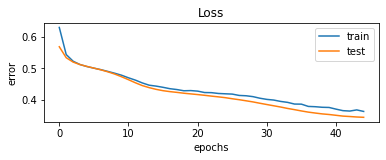

In [281]:
# evaluate the model
from matplotlib import pyplot
_, trainloss = modelh.evaluate(X_train, y_train, verbose=0)
_, testloss = modelh.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (trainloss, testloss))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(outputh.history['loss'], label='train')
pyplot.plot(outputh.history['val_loss'], label='test')
pyplot.xlabel('epochs')
pyplot.ylabel('error')

pyplot.legend()

In [0]:
`# From the graph we could find that there is bias in this  model testing has less error than training.

###### Will include learning rate in the SGD optimizer . It is a parameter which tells the optimizer how far to move the weights in the direction of gradient.

In [19]:
##including learning rate
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Flatten(input_shape=(11,)))
model1.add(tf.keras.layers.Dense(11, activation='relu'))
model1.add(tf.keras.layers.Dense(11, activation='relu'))
model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model1.compile(tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.0, nesterov=False, name='SGD'),loss='binary_crossentropy',metrics=["accuracy"])
output1 = model1.fit(X_train, y_train , validation_data= (X_test, y_test), epochs = 50)

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.6574 - accuracy: 0.6811 - val_loss: 0.6420 - val_accuracy: 0.7620
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 0.6242 - accuracy: 0.7822 - val_loss: 0.6145 - val_accuracy: 0.7890
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.5999 - accuracy: 0.7970 - val_loss: 0.5942 - val_accuracy: 0.7925
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 0.5818 - accuracy: 0.7972 - val_loss: 0.5790 - val_accuracy: 0.7925
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 0.5681 - accuracy: 0.7972 - val_loss: 0.5676 - val_accuracy: 0.7925
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 0.5576 - accuracy: 0.7972 - val_loss: 0.5588 - val_accuracy: 0.7925
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.5495 - accuracy: 0.7972 - val_loss: 0.5520 - val_accuracy: 0.7925
Epoch 

In [15]:
##including learning rate
modell = tf.keras.Sequential()
modell.add(tf.keras.layers.Flatten(input_shape=(11,)))
modell.add(tf.keras.layers.Dense(11, activation='relu'))
modell.add(tf.keras.layers.Dense(11, activation='relu'))
modell.add(tf.keras.layers.Dense(1, activation='sigmoid'))
modell.compile(tf.keras.optimizers.SGD(learning_rate=0.02, momentum=0.0, nesterov=False, name='SGD'),loss='binary_crossentropy',metrics=["accuracy"])
outputl = modell.fit(X_train, y_train , validation_data= (X_test, y_test), epochs = 50)

Epoch 1/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5255 - accuracy: 0.7772 - val_loss: 0.4750 - val_accuracy: 0.7925
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4659 - accuracy: 0.7972 - val_loss: 0.4524 - val_accuracy: 0.7930
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4447 - accuracy: 0.8019 - val_loss: 0.4321 - val_accuracy: 0.8020
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4267 - accuracy: 0.8136 - val_loss: 0.4145 - val_accuracy: 0.8190
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4118 - accuracy: 0.8242 - val_loss: 0.4007 - val_accuracy: 0.8230
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3994 - accuracy: 0.8317 - val_loss: 0.3887 - val_accuracy: 0.8295
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3885 - accuracy: 0.8390 - val_loss: 0.3785 - val_accuracy: 0.8450
Epoch 

Train: 0.865, Test: 0.868


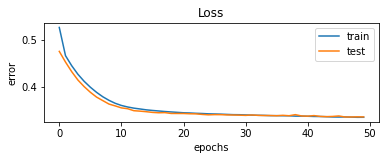

In [16]:
# evaluate the model
from matplotlib import pyplot
_, trainloss = modell.evaluate(X_train, y_train, verbose=0)
_, testloss = modell.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (trainloss, testloss))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(outputl.history['loss'], label='train')
pyplot.plot(outputl.history['val_loss'], label='test')
pyplot.xlabel('epochs')
pyplot.ylabel('error')

pyplot.legend()

In [17]:
y_predictl = modell.predict(X_test)
y_predictl
threshold=0.5
y_predict_l = np.where(modell.predict(X_test) > threshold, 1, 0)
y_predict_l

print('The accuracy of the model with learnign rate and momentum  is',accuracy_score(y_test,y_predict_l)*100)

The accuracy of the model with learnign rate and momentum  is 86.75


###### There is improvement in the model accuracy with learning rate for the learning rate 0.02, though not much improvement with the learning rate 0.001.Model accuracy reduced while using learning rate as 0.001. 
###### We will use Adam optimizer to predict the model accuracy

In [259]:
modelh1 = tf.keras.Sequential()
modelh1.add(tf.keras.layers.Flatten(input_shape=(11,)))
modelh1.add(tf.keras.layers.Dense(11, activation='relu'))
modelh1.add(tf.keras.layers.Dense(11, activation='relu'))
modelh1.add(tf.keras.layers.Dense(1, activation='sigmoid'))
modelh1.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])
outputh1 = modelh1.fit(X_train, y_train , validation_data= (X_test, y_test), epochs = 50 ,batch_size =40)

Epoch 1/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5693 - accuracy: 0.7258 - val_loss: 0.4700 - val_accuracy: 0.7955
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4480 - accuracy: 0.8035 - val_loss: 0.4181 - val_accuracy: 0.8165
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8239 - val_loss: 0.3975 - val_accuracy: 0.8415
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.8354 - val_loss: 0.3845 - val_accuracy: 0.8410
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8401 - val_loss: 0.3745 - val_accuracy: 0.8460
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3748 - accuracy: 0.8429 - val_loss: 0.3661 - val_accuracy: 0.8505
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3664 - accuracy: 0.8472 - val_loss: 0.3616 - val_accuracy: 0.8545
Epoch 

Train: 0.865, Test: 0.868


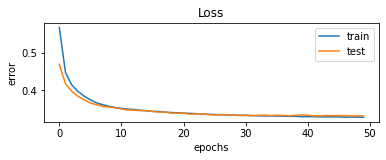

In [268]:
# evaluate the model
from matplotlib import pyplot
_, trainloss = modelh1.evaluate(X_train, y_train, verbose=0)
_, testloss = modelh1.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (trainloss, testloss))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(outputh1.history['loss'], label='train')
pyplot.xlabel('epochs')
pyplot.ylabel('error')

pyplot.plot(outputh1.history['val_loss'], label='test')
pyplot.legend()

In [261]:
y_predicth = modelh1.predict(X_test)
y_predicth
threshold=0.5
y_predict_h = np.where(modelh1.predict(X_test) > threshold, 1, 0)
y_predict_h

print('The accuracy of the model with adam optimizer is',accuracy_score(y_test,y_predict_h)*100)

The accuracy of the model with adam optimizer is 86.75


###### There is improvement in performace with adam optimizer.The accuracy increased to 86%. Model performed more or less equally in the training and test data

###### Including Dropout layer to check for model performance. Using Drop out to avoid any overfitting

In [283]:
modelhd = tf.keras.Sequential()
modelhd.add(tf.keras.layers.Flatten(input_shape=(11,)))
modelhd.add(tf.keras.layers.Dropout(0.2))
modelhd.add(tf.keras.layers.Dense(11, activation='relu'))
modelhd.add(tf.keras.layers.Dropout(0.2))
modelhd.add(tf.keras.layers.Dense(11, activation='relu'))
modelhd.add(tf.keras.layers.Dropout(0.2))
modelhd.add(tf.keras.layers.Dense(1, activation='sigmoid'))
modelhd.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])
outputhd = modelhd.fit(X_train, y_train , validation_data= (X_test, y_test), epochs = 100 ,batch_size =40)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.6647 - accuracy: 0.6283 - val_loss: 0.5448 - val_accuracy: 0.7925
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5280 - accuracy: 0.7894 - val_loss: 0.4872 - val_accuracy: 0.7925
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4977 - accuracy: 0.7930 - val_loss: 0.4648 - val_accuracy: 0.7925
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.7944 - val_loss: 0.4512 - val_accuracy: 0.7930
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.7968 - val_loss: 0.4430 - val_accuracy: 0.7930
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.7950 - val_loss: 0.4366 - val_accuracy: 0.7930
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4643 - accuracy: 0.7999 - val_loss: 0.4309 - val_accuracy: 0.7940

##### We could observe that accuracy is reduced after dropout and has not much contributed in overfitness.Hence not using this in our fully connected layers

Train: 0.854, Test: 0.850


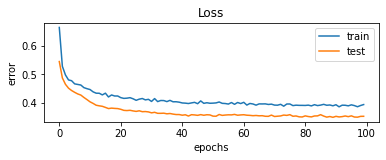

In [284]:
# we will use gridsearchcv to find out the best model parameters
# evaluate the model
from matplotlib import pyplot
_, trainloss = modelhd.evaluate(X_train, y_train, verbose=0)
_, testloss = modelhd.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (trainloss, testloss))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(outputhd.history['loss'], label='train')
pyplot.plot(outputhd.history['val_loss'], label='test')
pyplot.xlabel('epochs')
pyplot.ylabel('error')

pyplot.legend()

In [87]:
y_predicthd = modelhd.predict(X_test)
y_predicthd
threshold=0.5
y_predict_hd = np.where(modelhd.predict(X_test) > threshold, 1, 0)
y_predict_hd

print('The accuracy of the model with 1 hidden layer is',accuracy_score(y_test,y_predict_hd)*100)

The accuracy of the model with 1 hidden layer is 84.89999999999999


###### Model accuracy dropped after including Drop put layer which is used for regularization. We will not be using this layer in our model

##### Let us use RandomSearchCV to find out best hyper parameter.

In [0]:
from sklearn.model_selection import RandomizedSearchCV
def create_model():
	# create model
	model = tf.keras.Sequential()
	model.add(tf.keras.layers.Dense(11, input_dim=11, activation='relu'))
	model.add(tf.keras.layers.Dense(1, activation ='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model


In [0]:
modelgrid = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn = create_model,verbose=0)

In [0]:
# Finding the best epoch and batchsize using RandomizedsearchCV. This can be done with GridsearchCV as well. 
batch_size = [25,30,35,40,50]
epochs = [30,50,60,80,100]
param_grid = dict(epochs = epochs,batch_size = batch_size)
grid = RandomizedSearchCV(estimator=modelgrid, param_distributions=param_grid, n_jobs=-1)
grid_result = grid.fit(X, y)

In [285]:
print(grid_result.best_params_)
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
print('mean is', means)
print('stds is', stds)

{'epochs': 100, 'batch_size': 35}
mean is [0.73410001 0.6792     0.7396     0.7905     0.72349999 0.6734
 0.73329999 0.75960001 0.67539999 0.6954    ]
stds is [0.11014145 0.15816971 0.05854518 0.00903879 0.10552488 0.1513147
 0.11005391 0.06684491 0.16924521 0.09815265]


In [0]:
#from randomsearchCV we found best epochs and best batch_size . Next we will find the best optimizers and the number of hidden layers required

In [0]:

def create_model1(optimizer='adam'):
	# create model
	model = tf.keras.Sequential()
	model.add(tf.keras.layers.Dense(11, input_dim=11, activation='relu'))
	model.add(tf.keras.layers.Dense(1, activation ='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model

modelgrid1 = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn = create_model1,verbose=0)

optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid1 = dict(optimizer=optimizer,batch_size=[25,35,45,50],epochs=[60,70,100])
grid = GridSearchCV(estimator=modelgrid1, param_grid=param_grid1, n_jobs=-1,cv=5)
grid_result = grid.fit(X, y)

In [316]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
print('mean is ',means)
print('stds is',stds)

Best: 0.796300 using {'batch_size': 35, 'epochs': 60, 'optimizer': 'SGD'}
mean is  [0.79630001 0.6721     0.64820001 0.54830002 0.75259999 0.72539999
 0.73449999 0.79630001 0.6384     0.68269999 0.6785     0.67049999
 0.77360001 0.7466     0.79630001 0.7886     0.69810001 0.5821
 0.78199999 0.7437     0.73200001 0.79630001 0.795      0.68559999
 0.55070001 0.6391     0.7645     0.65009999]
stds is [0.00705407 0.14895382 0.06287654 0.18419355 0.03575667 0.08287424
 0.116547   0.00705407 0.2256086  0.03692506 0.05990576 0.10631698
 0.0215949  0.08998079 0.00705407 0.01049952 0.04005671 0.19022549
 0.02233159 0.07298398 0.1252266  0.00705407 0.00704272 0.03900436
 0.20211819 0.19485441 0.05350514 0.16981001]


In [0]:
#defining function to predict the number of layers required and best optimizer with already predicted epochs and batch_size with additional parametes closer to the already choosen values
def create_model2(layers,optimizer='adam'):
  model = tf.keras.Sequential()
  for layer_size in list(layers):
    model.add(tf.keras.layers.Flatten(input_shape=(11,)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(layer_size, activation = 'relu'))
  model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model
modelgrid2 = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn = create_model2,verbose=0)


In [27]:
layers = [(20),(11),(6),(8),(11, 11),(8,8),(20, 20),(6, 6),(10, 20, 30),(20, 20, 20),(6, 6, 6),(50,50)]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_gridnew = dict(layers= layers, epochs = [100,70,50], batch_size = [35,25,45],optimizer=optimizer)

grid1 = RandomizedSearchCV(estimator=modelgrid2, param_distributions=param_gridnew, n_jobs=-1,cv = 3)
grid1_result = grid1.fit(X, y)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [28]:
print("Best: %f using %s" % (grid1_result.best_score_, grid1_result.best_params_))
means = grid1_result.cv_results_['mean_test_score']
stds = grid1_result.cv_results_['std_test_score']
print(means)
print(stds)

Best: 0.860000 using {'optimizer': 'Nadam', 'layers': (6, 6), 'epochs': 70, 'batch_size': 45}
[       nan        nan        nan 0.71409357 0.85429986 0.50400063
 0.68970352 0.85819995 0.85999982        nan]
[       nan        nan        nan 0.05245148 0.00548334 0.04908131
 0.04409229 0.00187489 0.00352561        nan]


In [0]:
#The number of hidden neurons should be between the size of the input layer and the size of the output layer.
#The number of hidden neurons should be less than twice the size of the input layer.

In [135]:
#building the model with parameters obtained from RandomizedSearchCV
modelhnew1 = tf.keras.Sequential()
#modelhnew.add(tf.keras.layers.Flatten(input_shape=(11,)))
modelhnew1.add(tf.keras.layers.Flatten(input_shape=(11,)))
#modelhnew.add(tf.keras.layers.BatchNormalization())
modelhnew1.add(tf.keras.layers.Dense(6, activation='relu'))
modelhnew1.add(tf.keras.layers.Dense(6,activation='relu'))
modelhnew1.add(tf.keras.layers.Dense(1,activation='sigmoid'))
modelhnew1.compile(optimizer='Nadam',loss='binary_crossentropy',metrics=["accuracy"])
outputnew1 = modelhnew1.fit(X_train, y_train , validation_data= (X_test, y_test), epochs = 70 ,batch_size = 45)

Epoch 1/70
178/178 [==============================] - 1s 4ms/step - loss: 0.6867 - accuracy: 0.5900 - val_loss: 0.5611 - val_accuracy: 0.7975
Epoch 2/70
178/178 [==============================] - 1s 3ms/step - loss: 0.5029 - accuracy: 0.7985 - val_loss: 0.4677 - val_accuracy: 0.7965
Epoch 3/70
178/178 [==============================] - 1s 3ms/step - loss: 0.4556 - accuracy: 0.8044 - val_loss: 0.4350 - val_accuracy: 0.8100
Epoch 4/70
178/178 [==============================] - 1s 3ms/step - loss: 0.4343 - accuracy: 0.8141 - val_loss: 0.4154 - val_accuracy: 0.8205
Epoch 5/70
178/178 [==============================] - 1s 3ms/step - loss: 0.4176 - accuracy: 0.8216 - val_loss: 0.4014 - val_accuracy: 0.8290
Epoch 6/70
178/178 [==============================] - 1s 3ms/step - loss: 0.4035 - accuracy: 0.8300 - val_loss: 0.3907 - val_accuracy: 0.8355
Epoch 7/70
178/178 [==============================] - 1s 3ms/step - loss: 0.3921 - accuracy: 0.8342 - val_loss: 0.3808 - val_accuracy: 0.8380
Epoch 

In [29]:
#building the model with parameters obtained from RandomizedSearchCV
modelhnew1 = tf.keras.Sequential()
#modelhnew.add(tf.keras.layers.Flatten(input_shape=(11,)))
modelhnew1.add(tf.keras.layers.Flatten(input_shape=(11,)))
#modelhnew.add(tf.keras.layers.BatchNormalization())
modelhnew1.add(tf.keras.layers.Dense(6, activation='relu'))
modelhnew1.add(tf.keras.layers.Dense(6,activation='relu'))
modelhnew1.add(tf.keras.layers.Dense(1,activation='sigmoid'))
modelhnew1.compile(optimizer='Nadam',loss='binary_crossentropy',metrics=["accuracy"])
outputnew1 = modelhnew1.fit(X_train, y_train , validation_data= (X_test, y_test), epochs = 70 ,batch_size = 45)

Epoch 1/70
178/178 [==============================] - 1s 4ms/step - loss: 0.5381 - accuracy: 0.7962 - val_loss: 0.5103 - val_accuracy: 0.7925
Epoch 2/70
178/178 [==============================] - 1s 3ms/step - loss: 0.4939 - accuracy: 0.7972 - val_loss: 0.4822 - val_accuracy: 0.7925
Epoch 3/70
178/178 [==============================] - 1s 4ms/step - loss: 0.4732 - accuracy: 0.7972 - val_loss: 0.4650 - val_accuracy: 0.7925
Epoch 4/70
178/178 [==============================] - 1s 3ms/step - loss: 0.4588 - accuracy: 0.7972 - val_loss: 0.4519 - val_accuracy: 0.7925
Epoch 5/70
178/178 [==============================] - 1s 3ms/step - loss: 0.4482 - accuracy: 0.7972 - val_loss: 0.4430 - val_accuracy: 0.7925
Epoch 6/70
178/178 [==============================] - 1s 3ms/step - loss: 0.4412 - accuracy: 0.7972 - val_loss: 0.4372 - val_accuracy: 0.7925
Epoch 7/70
178/178 [==============================] - 1s 3ms/step - loss: 0.4364 - accuracy: 0.7975 - val_loss: 0.4325 - val_accuracy: 0.7925
Epoch 

In [153]:
modelhnew1.summary()
#Model summary is

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         (None, 11)                0         
_________________________________________________________________
dense_69 (Dense)             (None, 6)                 72        
_________________________________________________________________
dense_70 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


Train: 0.862, Test: 0.865


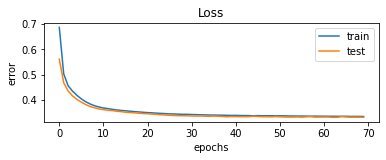

In [151]:

# evaluate the model
from matplotlib import pyplot
_, trainloss = modelhnew1.evaluate(X_train, y_train, verbose=0)
_, testloss = modelhnew1.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (trainloss, testloss))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(outputnew1.history['loss'], label='train')
pyplot.plot(outputnew1.history['val_loss'], label='test')
pyplot.xlabel('epochs')
pyplot.ylabel('error')

pyplot.legend()

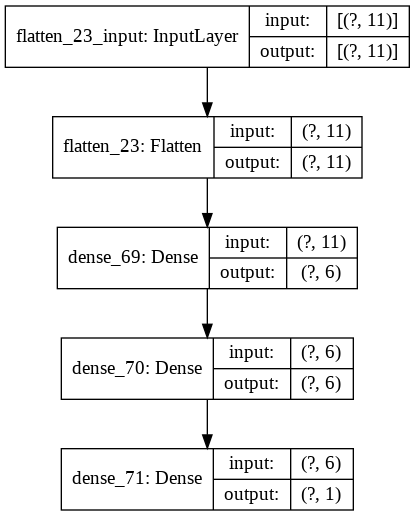

In [152]:
tf.keras.utils.plot_model(modelhnew1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

##### Predict the results using 0.5 as a threshold

In [138]:
probs = modelhnew1.predict_proba(X_test)
y_predictnw1 = modelhnew1.predict(X_test)
y_predictnw1

array([[0.02584474],
       [0.1289662 ],
       [0.0859538 ],
       ...,
       [0.01785237],
       [0.05491815],
       [0.40364522]], dtype=float32)

In [139]:
threshold=0.5
y_predict_nw1 = np.where(modelhnew1.predict(X_test) >= threshold, 1, 0)
y_predict_nw1
  

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [140]:
print('The accuracy score of the matrix is',accuracy_score(y_test,y_predict_nw1)*100)

The accuracy score of the matrix is 86.55000000000001


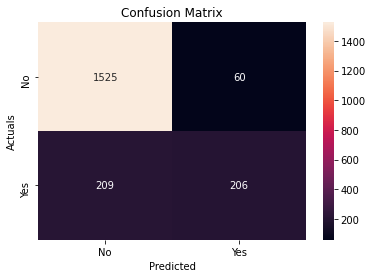

In [142]:

cmnew = confusion_matrix(y_test, y_predict_nw1)
class_label = ["No", "Yes"]
df_cmn = pd.DataFrame(cmnew, index = class_label, columns = class_label)
sns.heatmap(df_cmn, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actuals")
plt.show()

In [143]:
print('classification report is')
print(classification_report(y_test,y_predict_nw1))

classification report is
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1585
           1       0.77      0.50      0.60       415

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.85      2000



threshold is
[2 1 0]


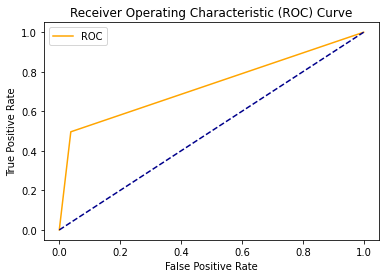

In [144]:
from sklearn.metrics import roc_curve
fprRfc, tprRfc, thresholdsRfc = roc_curve(y_test, y_predict_nw1)
#pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

print('threshold is')
print(thresholdsRfc)
plt.plot(fprRfc, tprRfc, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [145]:
print('Sensitivity of the model is')
sensitivity = cmnew[0][0]/(cmnew[0][0]+cmnew[1][0])
print(sensitivity*100)

Sensitivity of the model is
87.94694348327566


In [146]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC is: %.2f' % auc)
#The AUC score is closer to 1 which means model had performed considerably goood.


AUC is: 0.87


In [148]:
print('Precision of the model is')
Precision = cmnew[0][0]/(cmnew[0][0] + cmnew[0][1])
print(Precision*100)

Precision of the model is
96.21451104100946


In [149]:
#Specificity
print('Specificity is')
specificity  = cmnew[0][0]/float(cmnew[0][0] + cmnew[0][1])
print(specificity*100)



Specificity is
96.21451104100946


In [150]:
print("Falsely classified customer churn =  %.1f Percent" %(cmnew[0][1]/ sum(sum(cmnew))*100))
print("Falsely classified as NON-churning customer = %.1f Percent"%(cmnew[1][0]/ sum(sum(cmnew))*100))
print("Truly classified as customer churn = %.1f Percent"% (cmnew[1][1]/ sum(sum(cmnew))*100))
print("Truly classified as NON-churning customer = %.1f Percent"% (cmnew[0][0]/ sum(sum(cmnew))*100))

Falsely classified customer churn =  3.0 Percent
Falsely classified as NON-churning customer = 10.4 Percent
Truly classified as customer churn = 10.3 Percent
Truly classified as NON-churning customer = 76.2 Percent


In [51]:
!pip install imblearn

##### During EDA we found that there is class imbalance problem. Only 20% of data is available for customer churn. This class imbalance problem can be resolved by oversampling using SMOTE. We will use SMOTE to resample data and apply it over NN to predict the model accuracy and reduce False Negative rate . Recall should be high.

In [194]:
churn = df[df['Exited']==1]
non_churn = df[df['Exited']==0]
print('the customer churn is',churn.shape)
print('Customer non churn is', non_churn.shape)

the customer churn is (2037, 11)
Customer non churn is (7963, 11)


In [49]:
from imblearn.over_sampling import SMOTE
#dropping Tenure the least correlated variable with the target variable
df
X4= df.drop(['Exited'],axis=1)
X4 = pd.get_dummies(X3,drop_first = True)


y4 = df['Exited']
X4

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [51]:
##implementing oversampling for imbalanced data
smk = SMOTE(random_state=42)
X_resn,y_resn=smk.fit_sample(X4,y4)
##verifying the shape after oversampling
X_resn.shape , y_resn.shape

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


((15926, 11), (15926,))

In [52]:

X_resn

array([[6.19000000e+02, 4.20000000e+01, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.08000000e+02, 4.10000000e+01, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.02000000e+02, 4.20000000e+01, 8.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.03879661e+02, 3.26431531e+01, 3.76763517e+00, ...,
        1.00000000e+00, 0.00000000e+00, 4.10788277e-01],
       [7.32455512e+02, 4.74941446e+01, 5.38524699e+00, ...,
        0.00000000e+00, 3.73536145e-01, 6.26463855e-01],
       [7.06046363e+02, 3.16854318e+01, 7.38576137e+00, ...,
        0.00000000e+00, 4.61920457e-01, 0.00000000e+00]])

In [53]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y3)))
print('Resampled dataset shape {}'.format(Counter(y_resn)))

Original dataset shape Counter({0: 7963, 1: 2037})
Resampled dataset shape Counter({1: 7963, 0: 7963})


In [0]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_resn, y_resn, test_size = 0.2, random_state=42)

In [68]:
#scaling dataset
X_train3 = zscore(X_train3)
X_train3[1:10]

array([[ 1.08886173,  0.08473251, -1.46597704,  0.77774657,  0.8132869 ,
        -1.64676948,  1.16569405,  0.74461331, -0.69654989, -0.58185189,
         1.0558797 ],
       [-0.58881133, -0.53138597, -0.89117119,  1.04224484, -0.10728719,
         0.69622403, -0.03057882, -0.7745278 , -0.69654989,  0.81917765,
         1.0558797 ],
       [ 0.09712178,  1.37684544,  1.11288081,  0.60754809, -0.82988688,
        -1.64676948,  1.16569405,  0.32599548,  1.58443647, -0.58185189,
        -1.08387645],
       [ 0.0753253 ,  0.48230572,  0.00765602,  0.51102395,  0.8132869 ,
         0.69622403,  1.16569405,  0.66315352, -0.69654989, -0.58185189,
        -1.08387645],
       [-0.40419731, -0.80980722,  0.00765602, -0.20443926, -0.82988688,
         0.69622403, -0.9695868 , -1.59289416, -0.69654989,  1.91890828,
         1.0558797 ],
       [-0.6657551 , -0.61102061,  0.74447255, -1.33616332,  0.8132869 ,
         0.69622403,  1.16569405,  0.14011838, -0.69654989,  1.91890828,
        -1.083

In [69]:
X_test3 = zscore(X_test3)
X_test3[1:4]

array([[-0.46747297, -0.01694498, -0.40239596,  0.83316834, -0.84913838,
         0.68977642, -0.98842295,  0.96939821,  1.56784911, -0.57061678,
        -1.05048956],
       [ 0.33037818, -1.00005826,  1.42705263,  0.62407967,  0.75362683,
         0.68977642,  1.13912582,  0.02055584, -0.69622377,  1.95288481,
        -1.05048956],
       [ 0.54159124,  0.58048789,  0.59520131, -0.27969607,  0.31526595,
         0.68977642, -0.98842295, -1.46585999, -0.69622377,  0.11956814,
        -1.05048956]])

In [89]:
modelO = tf.keras.Sequential()
#modelhnew.add(tf.keras.layers.Flatten(input_shape=(11,)))
modelO.add(tf.keras.layers.Flatten(input_shape=(11,)))
#modelO.add(tf.keras.layers.BatchNormalization())
modelO.add(tf.keras.layers.Dense(11, activation='relu'))
modelO.add(tf.keras.layers.Dense(11,activation='relu'))
modelO.add(tf.keras.layers.Dense(1,activation='sigmoid'))
modelO.compile(optimizer='nadam',loss='binary_crossentropy',metrics=["accuracy"])
outputO = modelO.fit(X_train3, y_train3 , validation_data= (X_test3, y_test3), epochs = 100 ,batch_size = 45)


Epoch 1/100
284/284 [==============================] - 1s 4ms/step - loss: 0.6156 - accuracy: 0.6615 - val_loss: 0.5557 - val_accuracy: 0.7210
Epoch 2/100
284/284 [==============================] - 1s 3ms/step - loss: 0.5346 - accuracy: 0.7421 - val_loss: 0.5206 - val_accuracy: 0.7448
Epoch 3/100
284/284 [==============================] - 1s 3ms/step - loss: 0.5029 - accuracy: 0.7619 - val_loss: 0.4921 - val_accuracy: 0.7602
Epoch 4/100
284/284 [==============================] - 1s 3ms/step - loss: 0.4769 - accuracy: 0.7767 - val_loss: 0.4686 - val_accuracy: 0.7778
Epoch 5/100
284/284 [==============================] - 1s 3ms/step - loss: 0.4626 - accuracy: 0.7882 - val_loss: 0.4562 - val_accuracy: 0.7806
Epoch 6/100
284/284 [==============================] - 1s 3ms/step - loss: 0.4534 - accuracy: 0.7911 - val_loss: 0.4468 - val_accuracy: 0.7878
Epoch 7/100
284/284 [==============================] - 1s 3ms/step - loss: 0.4445 - accuracy: 0.7954 - val_loss: 0.4453 - val_accuracy: 0.7878

Train: 0.892, Test: 0.879


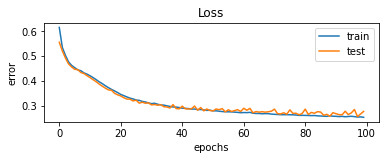

In [90]:
# evaluate the model
from matplotlib import pyplot
_, trainloss = modelO.evaluate(X_train3, y_train3, verbose=0)
_, testloss = modelO.evaluate(X_test3, y_test3, verbose=0)
print('Train: %.3f, Test: %.3f' % (trainloss, testloss))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(outputO.history['loss'], label='train')
pyplot.plot(outputO.history['val_loss'], label='test')
pyplot.xlabel('epochs')
pyplot.ylabel('error')

pyplot.legend()

In [91]:
y_predictO = modelO.predict(X_test3)
y_predictO


array([[0.06317367],
       [0.6967207 ],
       [0.24427031],
       ...,
       [0.21847785],
       [0.94888186],
       [0.9999999 ]], dtype=float32)

In [92]:
threshold=0.5
y_predict_O = np.where(modelO.predict(X_test3) >= threshold, 1, 0)
y_predict_O



array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [1]])

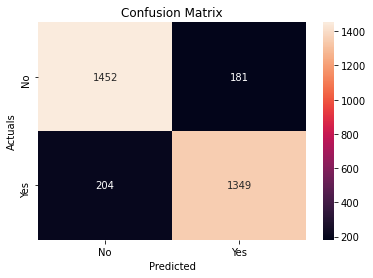

In [93]:
cmnew1 = confusion_matrix(y_test3, y_predict_O)
class_label = ["No", "Yes"]
df_cmn = pd.DataFrame(cmnew1, index = class_label, columns = class_label)
sns.heatmap(df_cmn, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actuals")
plt.show()



In [94]:
print('The accuracy score of the matrix is',accuracy_score(y_test3,y_predict_O)*100)

The accuracy score of the matrix is 87.91588198367859


In [96]:
print("Falsely classified customer churn =  %.1f Percent" %(cmnew1[0][1]/ sum(sum(cmnew1))*100))
print("Falsely classified as NON-churning customer = %.1f Percent"%(cmnew1[1][0]/ sum(sum(cmnew1))*100))
print("Truly classified as customer churn = %.1f Percent"% (cmnew1[1][1]/ sum(sum(cmnew1))*100))
print("Truly classified as NON-churning customer = %.1f Percent"% (cmnew1[0][0]/ sum(sum(cmnew1))*100))

Falsely classified customer churn =  5.7 Percent
Falsely classified as NON-churning customer = 6.4 Percent
Truly classified as customer churn = 42.3 Percent
Truly classified as NON-churning customer = 45.6 Percent


In [101]:
classification_report(y_test3,y_predict_O)

'              precision    recall  f1-score   support\n\n           0       0.88      0.89      0.88      1633\n           1       0.88      0.87      0.88      1553\n\n    accuracy                           0.88      3186\n   macro avg       0.88      0.88      0.88      3186\nweighted avg       0.88      0.88      0.88      3186\n'

###### Conclusion : We built a NN model to predict churn rate with bank customer. First we built NN model with one input an doutput layer which had model accuracy as 81%.Adding 2 hidden layers to the model has increased its accuracy to 85%.Choosing correct optmizier 'adam' had increased the model accuracy to 86%, with SGD optizer the model accuracy was 85%. We checked the effect of learning rate, momentum and dropout parameters to the SGD model. With learnig rate 0.001, the model accuracy dropped to 79% and with learning rate 0.02, the model accuracy increased to 86%.We also predicted best parameters using RansomisedSearchCV which has lesser calculation time than GridsearchCV. We predicted the number of Epochs, batch_size number of hidden layers and number of neurons required in each hidden layer using RandomisedSearchCV. We also used Activation function as sigmoid in output layer as it is binar class classification. We also used Relu as activation function for the hidden layers as it is best recommended. Which hasF(x) zero for negative values and f(x) for other inputs. We saw the training error and test error are more or less same in this model. We could also find little bias in the test while using BatchNormalization. we built final model using Nadam optimizer and 70 epochs with batch_size as 35 as suggested from RamdomisedSearchCV. We found that False Negative rate was 10.1 % in the NN model. To solve class imbalance problem we used SMOTE to oversample by having equal classes for binary class classification. Adding this has reduced False Negative predictions from 10.4% to 6.4% and the accuracy of the model is increased to 87.9%